# Evaluating Regression

## Error Metrics

Error metrics, or residuals, are used in linear regression models to evaluate model performance. These metrics measure the difference between actual and predicted values. 

### Mean Absolute Error

Mean Absolute Error (MAE) is the average absolute difference between actual and predicted model values. MAE handles outliers well because of the absolute value and large errors don't overpower the smaller ones, so its output gives an unbiased view of the model's performance. 

\begin{equation*}      
\text{MAE} = \sum_{i=1}^{n} \frac{|y_i - x_i|}{n}
\label{eq:1} \tag{1}
\end{equation*} 

In [22]:
from sklearn.metrics import mean_absolute_error
y_actual = [3, -0.5, 1, 3.5]
y_pred = [2.5, 0, 0.2, 3]
mean_absolute_error(y_actual, y_pred)

0.575

### Mean Squared Error

Mean Squared Error (MSE) is the average squared difference between actual and predicted model values. Unlike MAE, MSE heavily counts against outliers. The square allows larger errors to overpower the smaller ones, which means a single outlier could yield a high error value--allowing us to assume that the model is worse than it actually is. On the other hand, if all the errors are small (i.e. less than 1), we may assume the model is better than it actually is.  

\begin{equation*}
\text{MSE} = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2 
\label{eq:2} \tag{2}
\end{equation*} 

In [23]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_actual, y_pred)

0.34750000000000003

### Root Mean Squared Error

Root Mean Squared Error (RMSE) is the average root-squared difference between actual and predicted model values. It's the root-squared value of MSE.

\begin{equation*}
\text{RMSE} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2} 
\label{eq:3} \tag{3}
\end{equation*}

In [24]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_actual, y_pred, squared=False)

0.5894913061275798

### R-Squared

The $R^2$ score, or the coefficient of determination, measures the proportion of variance of the dependent variable explained by the independent variable. The closer $R^2$ is to 1, the better. $R^2$ also the square of the correlation between the independent variables. Below is the equation for $R^2$, where $\text{SSE}$ is the sum of squared errors and $\text{SST}$ is the total sum of squares.

\begin{equation*}   
\text{R}^2 = 1 - \frac{\sum_{i=1}^m (y_i - \hat{y_i})^2}{\sum_{i=1}^m (y_i - \bar{y})^2} = 1 - \frac{\text{SSE}}{\text{SST}}
\label{eq:4} \tag{4}
\end{equation*} 

The **Adjusted $R^2$** score is a modified version of $R^2$ that accounts for the number of predictors in the model. It increases if a new term improves the fit and decreases if there's little to no improvement. Below is the equation for $\text{R}_{\text{adj}}^2$, where $n$ is the total sample size and $k$ is the number of predictors.

\begin{equation*}
\text{R}_{\text{adj}}^2 =  1 - \frac{\text{SSE}}{\text{SST}} \cdot \frac{n-1}{n-k-1} 
\label{eq:5} \tag{5}
\end{equation*} 

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_actual, y_pred)
n, k = len(y_actual), x_pred.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

#### Example

*Running an OLS regression of $y$ ~ $x_1$ gives $R_1^2 = 0.3$. Running an OLS regression of $y$ ~ $x_2$ gives $R_2^2 = 0.4$. Find $R^2$ for $y$ ~ $x_1 + x_2$.* 

$R_1^2 \neq R_2^2$, which means $x_1$ and $x_2$ aren't perfectly correlated. We don't know anything else about $x_1$ and $x_2$, so we'll need to express $R^2$ as a range of values. The maximum bound for $R^2$ is reached when $x_1$ and $x_2$ are orthogonal, or uncorrelated. In this case, $R^2 = \text{min}(R_1^2 + R_2^2, 1) = 0.7$. The minimum bound for $R^2$ is reached when $x_2$ contains all the information of $x_1$. In this case, $R^2 = R_2^2 = 0.4$. Therefore, $0.4 \leq R^2 \leq 0.7$. 

The result is simulated below using the following equation for $R^2$ with only correlation coefficients:

\begin{equation*}   
\text{R}^2 = \frac{r_{y,x_1}^2 + r_{y,x_2}^2 - 2 r_{y,x_1}r_{y,x_2}r_{x_1,x_2}}{1 - r_{x_1,x_2}^2}
\label{eq:6} \tag{6}
\end{equation*} 

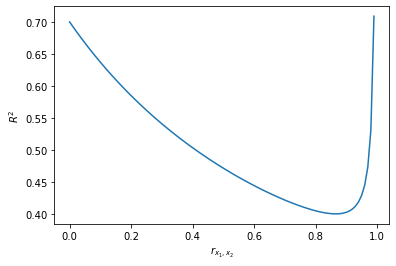

In [28]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(range(100))/100
y = (0.3 + 0.4 - 2*(0.3**0.5)*(0.4**0.5)*x)/(1-x**2)

plt.plot(x,y)
plt.ylabel('$R^2$')
plt.xlabel('$r_{x_1,x_2}$')
plt.show()

## Regression Analysis

### Coefficients

Coefficients describe the relationship between each independent variable and the dependent variable. The first coefficient without an input is called the **intercept**. Think of it as the base case of your model. The intercept adjusts what the model predicts when all your inputs are 0. 

The remaining coefficients are the **regression coefficients**. They give the slope of the line of best fit. The sign of a regression coefficient tells you whether there is a positive or negative correlation between each independent variable and the dependent variable. A positive coefficient indicates that the mean of the dependent variable will increase as the value of the independent variable increases. A negative coefficient indicates that the dependent variable will decrease as the independent variable increases.

For a simple linear regression, the regression coefficient can be written in terms of the correlation coefficient and standard deviations of $x$ and $y$:

\begin{equation*}
\beta = r_{xy} \frac{\sigma_y}{\sigma_x}
\label{eq:7} \tag{7}
\end{equation*}  

A regression with two independent variables, the regression coefficients $\beta_1$ and $\beta_2$ are calculated as follows:

\begin{equation*}
\begin{split}
\beta_1 &= \frac{\sum x_2^2 \sum x_1 y - \sum x_1 x_2 \sum x_2 y}{\sum x_1^2 \sum x_2^2 - \sum x_1 x_2} \\
\beta_2 &= \frac{\sum x_1^2 \sum x_2 y - \sum x_1 x_2 \sum x_1 y}{\sum x_1^2 \sum x_2^2 - \sum x_1 x_2}
\end{split}
\label{eq:8} \tag{8}
\end{equation*}   

We can also find $R^2$ using these regression coefficients:

\begin{equation*}
\text{R}^2 = \beta_1 r_{y,x1} + \beta_2 r_{y,x2}
\label{eq:9} \tag{9}
\end{equation*}  

### Statistical Testing

See [here](http://mathcenter.oxford.emory.edu/site/math117/hypothesisTestsProportionsOneSample/) for an in-depth explanation (with an example) of hypothesis testing, standard errors, t-statistics, p-values, and the empirical rule. To summarize, let's say we have the following null and alternate hypothesis:

\begin{equation*}   
\text{H}_0: p = 0.5, \text{H}_1: p \neq 0.5 
\end{equation*} 

The following can be used to find the **standard error**:

\begin{equation*}   
\text{SE} = \sqrt{\frac{\sigma}{n}} = \sqrt{\frac{p(1-p)}{n}}
\label{eq:10} \tag{10}
\end{equation*} 

where $\sigma$ is the sample standard deviation and $n$ is the sample size. From here, we can calculate the **t-statistic**, or the z-score of the sample distribution:

\begin{equation*}   
t = \frac{x - \mu}{\text{SE}}
\label{eq:11} \tag{11}
\end{equation*} 

where $x$ is the observed $p$ and $\mu = p$ for a normal distribution. You can use this $t$ to find the p-value, or the probability that $X$ falls after $t$. If the p-value is less than the significance level, $\alpha$, we reject the null hypothesis. You can also calculate $t$ in terms of the correlation coefficient:

\begin{equation*}   
t = r \cdot \frac{n-2}{1-r^2}
\label{eq:12} \tag{12}
\end{equation*} 

Instead of p-values, the **empirical rule** can be used to assess the null hypothesis. The rule states that 68.3% of the probability distribution falls within one standard deviation of the mean, 95.5% within two, and 99.7% within three. For example, if $t = 2.2$ and $\alpha = 0.05$, I can discount at least 95.5% of my probability distribution--leaving only 4.5%. 0.045 is less than $\alpha$, so I'd reject my null hypothesis. 

### Effects of Input Changes

The table below summarizes which of the above regression variables change once the input data changes for some predicted output $\hat{Y} = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_n X_n + \epsilon$.

Type of Change | Effect on Coefficients | Effect on T-Statistic | Effect on $R^2$
--------------------------------------------|-----------------------------|---------------------------|---------------------------
Swapping $X$ and $Y$ in a simple linear model |The slope of the regression line will be a rescaled version of the old one; $r_{xy} = r_{yx}$ since the correlation coefficient is symmetrical, so $\beta_{yx} = r_{xy} \frac{\sigma_y}{\sigma_x}$  and $\beta_{xy} = r_{yx} \frac{\sigma_x}{\sigma_y} = \beta_{yx} \frac{\sigma_x^2}{\sigma_y^2}$| None; the correlation coefficients are symmetrical | None; $R^2 = r_{xy}^2 = r_{yx}^2$
Duplicating the covariates | None; Generally, mean and variance of the sample remain the same. Mathematically, $\beta$ remains unchanged ([proof](https://stats.stackexchange.com/questions/216003/what-are-the-consequences-of-copying-a-data-set-for-ols)). | Increases; t-statistic is directly proportional to the sample size | None; regression coefficients and correlation coefficients remain the same
Changing the sample size, $n$ | Coefficients aren't directly affected by the sample size, but they are affected by the sampling variation. Sampling variability decreases as the sample size increases. | Increases or decreases | Affected by the sampling variation
Adding a new covariate, $X_i$ | All coefficients are jointly estimated, so a new variable will change the existing coefficients | Affected by the change in the joint variance of $Y$ | Increases; any new nonzero term will improve the fit and increase $R^2$
Removing a covariate, $X_i$ |All coefficients are jointly estimated, so removing a variable will change the remaining coefficients| Affected by the change in the joint variance of $Y$ | Affected by the change in the regression coefficient and variance
Changing units for a covariate, $X_i$ | Changes the unit of the corresponding coefficient, $\beta_i$ | None | None